In [4]:
##11月7日
import rasterio

In [3]:
import cartopy

In [10]:
import matplotlib.pyplot as plt

import numpy as np

In [2]:
from osgeo import gdal

In [6]:
path_img = 'E:\开源\chenggong_tif_wgs.tif'

In [13]:
dset_img= gdal.Open(path_img)
img_array= dset_img.ReadAsArray()
img_array = img_array.transpose(1,2,0)
img_array.shape

(3209, 3230, 6)

In [14]:
img_array[1000:1200,1000:1200,1]

array([[2622, 3158, 3872, ..., 2608, 2438, 2256],
       [2782, 2824, 2946, ..., 2572, 2604, 2604],
       [2562, 2422, 2542, ..., 2556, 2832, 2744],
       ...,
       [3710, 3710, 2892, ..., 2482, 2798, 2208],
       [3370, 3646, 3646, ..., 2550, 2336, 2208],
       [3144, 3452, 3452, ..., 2250, 2160, 2312]], dtype=uint16)

In [ ]:
##以上3710...为DN值，反射率，但反射率0-1，为什么为几千呢
# 因为为例节省空间x10000，0-10000

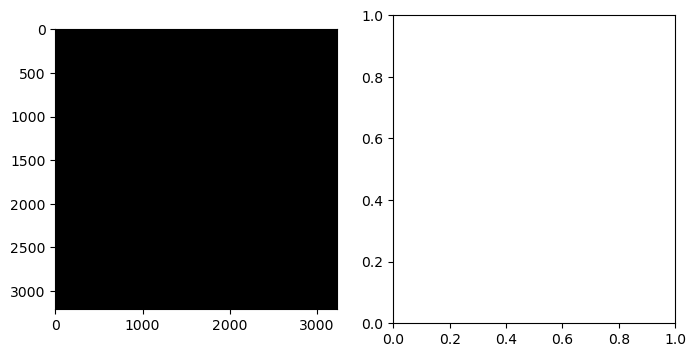

In [11]:
img_array = img_array/10000
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(img_array[:,:,0])
ax[0].imshow(img_array[:,:,0:3])

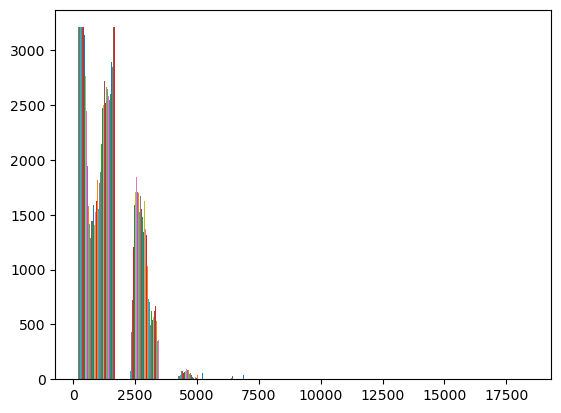

In [15]:
##显示效果不好，先直方图拉伸一下
band_1 = img_array[:,:,0]
_ = plt.hist(band_1)

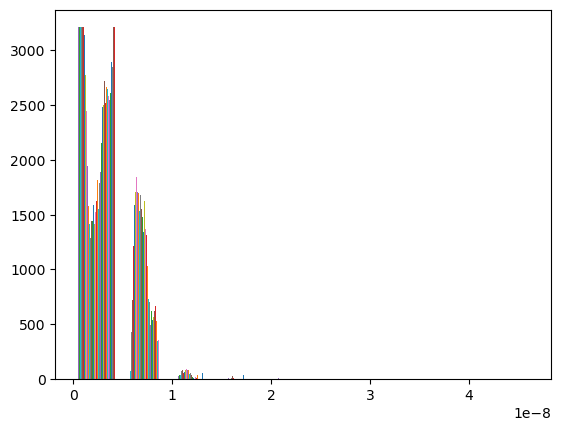

In [ ]:
min_dn, max_dn = 0,0.4
band_1_ = np.clip(band_1, min_dn, max_dn)
##拉到0-1，最大最小值归一化
band_1_ = (band_1-min_dn)/(max_dn - min_dn)
_ = plt.hist(band_1_)

In [ ]:
##再显示，显示效果变好

In [17]:
min_dn, max_dn = np.percentile(band_1, 5),np.percentile(band_1, 95)
print(min_dn, max_dn)

0.0 2824.0


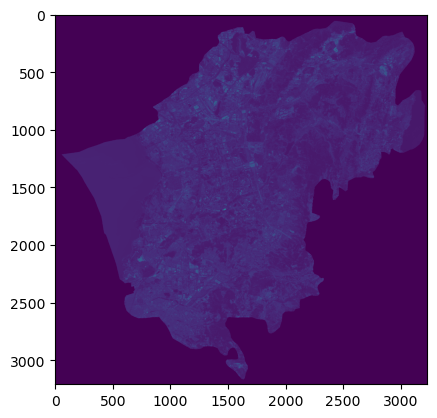

In [18]:
plt.imshow(band_1)


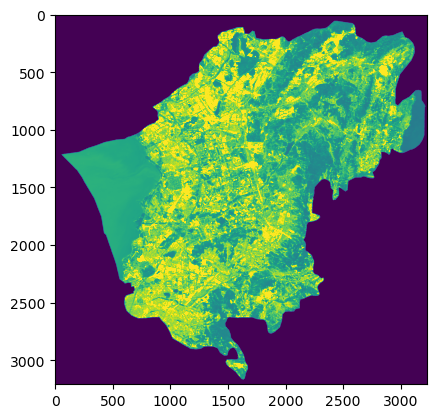

In [19]:
plt.imshow(band_1, vmax=max_dn,vmin=min_dn)

In [ ]:
##以上功能对应的QGIS的属性里的，symbol中的设置拉伸范围
##以上还只是单波段的拉伸，以下为多波段的拉伸效果

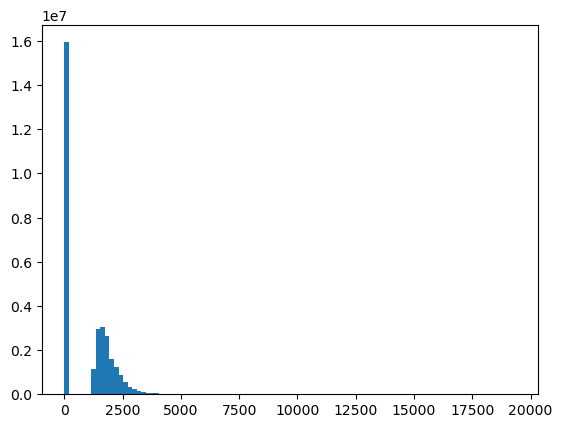

In [20]:
band_color = img_array[:,:,0:3].copy()
##三维数组转成一维数组
band_color_ = band_color.flatten()
_=plt.hist(band_color_, bins = 100)

In [21]:
##自动确定阈值
min_dn, max_dn = np.percentile(band_color_, 5),np.percentile(band_color_, 95)
print(min_dn, max_dn)

0.0 2550.0


In [22]:
band_color_nor = np.clip(band_color, min_dn, max_dn)
band_color_nor = (band_color_nor-min_dn)/(max_dn-min_dn)

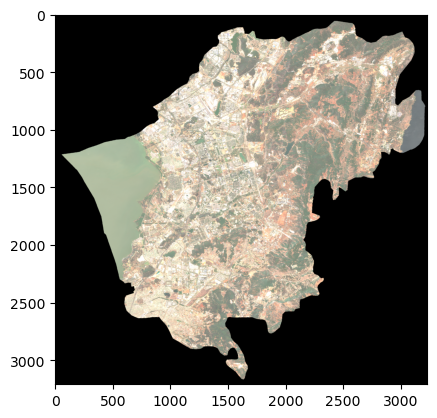

In [23]:
plt.imshow(band_color_nor)

In [ ]:
##如果以上与人眼不一样，假彩色，因为在波段彩色叠加次序不对，第一个应为red，第二个为绿,蓝
##但是我这不知道为什么已经显示真彩色，以下操作后，得到的反而为假彩色


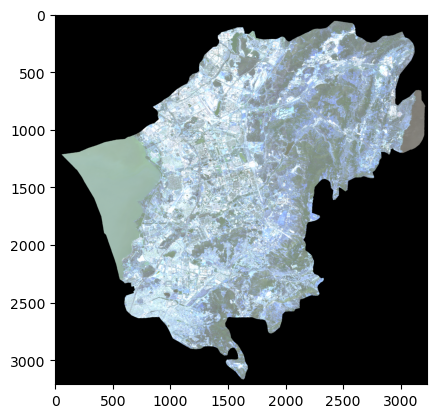

In [27]:
band_color_nor_ = np.stack([band_color_nor[:,:,2],band_color_nor[:,:,1],band_color_nor[:,:,0]],axis = 2)
plt.imshow(band_color_nor_)